### Introduction to Digital Image Processing with Python
The most fundamental libraries we will be using throughout the entire course are:
* **OpenCV**
 * For loading, saving and manipulating images and videos.
* **numpy**
 * Powerful tool for working with (multidimensional) matrices (which are mathematical representations of digital images and videos).
* **matplotlib**
 * Library for easy plotting (figures, plots, images, etc.).

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

Let's start by loading and plotting an image.

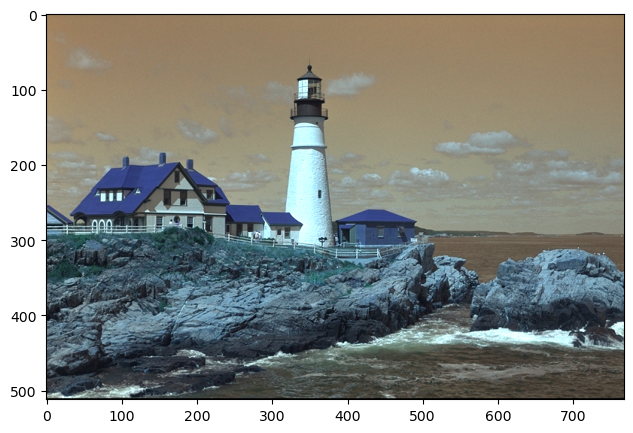

In [4]:
img = cv2.imread('../data/kodim21.png')
plt.imshow(img)

**Important**: For historical reasons, OpenCV loads images in **BGR** colour space (not RGB!). We need to manually change the order of colour channels.

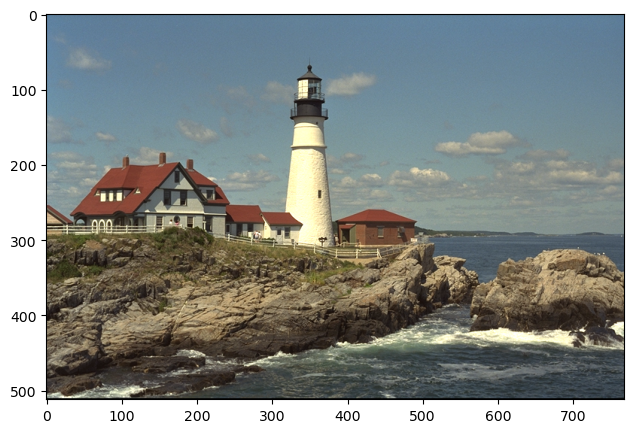

In [6]:
rows, cols, channels = img.shape
img_rgb = np.zeros_like(img)

for r in range(rows):
    for c in range(cols):
        pixel = img[r, c, :]
        img_rgb[r, c, 0] = pixel[2]
        img_rgb[r, c, 1] = pixel[1]
        img_rgb[r, c, 2] = pixel[0]
        
plt.imshow(img_rgb)
        

Fortunately, OpenCV provides us with a large variety of conversion functions.

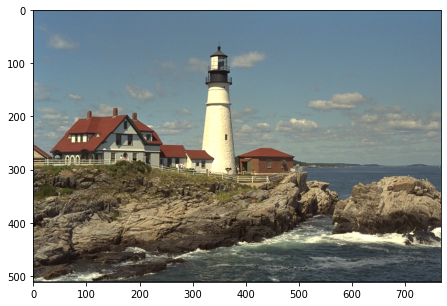

In [8]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### RGB vs CieLAB
RGB is not a perceptive colour space. The mathematical difference between two colours does not necessarilly relate to the perceptual difference. Let's see an example.

(<AxesSubplot:title={'center':'Color 3'}>,
 Text(0.5, 1.0, 'Color 3'))

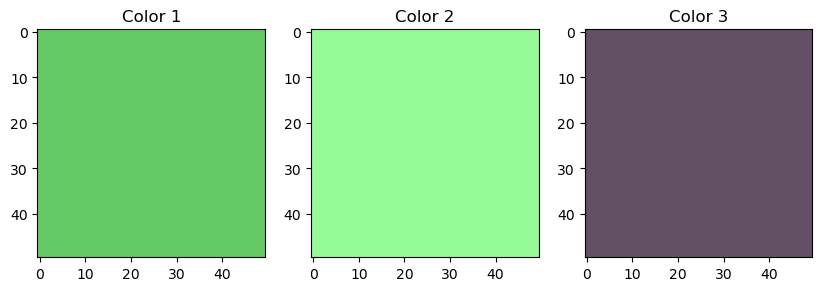

In [7]:
color_1 = np.zeros((50, 50, 3), dtype=np.uint8)
color_1[..., 0] = 100
color_1[..., 1] = 200
color_1[..., 2] = 100

# |color_1 - color_2| = 150
color_2 = np.zeros((50, 50, 3), dtype=np.uint8)
color_2[..., 0] = 150
color_2[..., 1] = 250
color_2[..., 2] = 150

# |color_1 - color_3| = 120
color_3 = np.zeros((50, 50, 3), dtype=np.uint8)
color_3[..., 0] = 100
color_3[..., 1] = 80
color_3[..., 2] = 100

plt.subplot(131), plt.imshow(color_1), plt.title('Color 1')
plt.subplot(132), plt.imshow(color_2), plt.title('Color 2')
plt.subplot(133), plt.imshow(color_3), plt.title('Color 3')

In [8]:
color_1_lab = cv2.cvtColor(color_1, cv2.COLOR_RGB2LAB)
color_2_lab = cv2.cvtColor(color_2, cv2.COLOR_RGB2LAB)
color_3_lab = cv2.cvtColor(color_3, cv2.COLOR_RGB2LAB)

print('Color 1 (LAB)', color_1_lab[0, 0, :])
print('Color 2 (LAB)', color_2_lab[0, 0, :])
print('Color 3 (LAB)', color_3_lab[0, 0, :])
print(' ')

print('SAD with respect to color 1')
print('Color 2', np.sum(np.abs(color_1_lab[0, 0, :].astype(np.float32) - color_2_lab[0, 0, :].astype(np.float32))))
print('Color 3', np.sum(np.abs(color_1_lab[0, 0, :].astype(np.float32) - color_3_lab[0, 0, :].astype(np.float32))))

Color 1 (LAB) [186  79 169]
Color 2 (LAB) [231  79 167]
Color 3 (LAB) [ 94 140 119]
 
SAD with respect to color 1
Color 2 47.0
Color 3 203.0
